In [15]:
#!/usr/bin/env python

In [16]:
import wuml
import numpy as np
import torch
import wplotlib

The idea of training a neural network boils down to 3 steps<br>
	1. Define a network structure<br>
		Example: This is a 3 layer network with 100 node width<br>
			networkStructure=[(100,'relu'),(100,'relu'),(1,'none')]<br>
			Potential Activation Functions are: softmax, relu, tanh, sigmoid, none<br>
	2. Define a cost function<br>
	3. Call train()

In [17]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
def costFunction(x, y, ŷ, ind):
	return torch.sum((y- ŷ) ** 2)	

Create network and train

In [18]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(100,'relu'),(100,'relu'),(1,'none')], max_epoch=50, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 1, Avg Loss: 76.8403, Learning Rate: 0.00100000	epoch: 2, Avg Loss: 66.7820, Learning Rate: 0.00100000	epoch: 3, Avg Loss: 57.5523, Learning Rate: 0.00100000	epoch: 4, Avg Loss: 49.4817, Learning Rate: 0.00100000	epoch: 5, Avg Loss: 42.7098, Learning Rate: 0.00100000	epoch: 6, Avg Loss: 36.7712, Learning Rate: 0.00100000	epoch: 7, Avg Loss: 31.4137, Learning Rate: 0.00100000	epoch: 8, Avg Loss: 26.6555, Learning Rate: 0.00100000	epoch: 9, Avg Loss: 22.5299, Learning Rate: 0.00100000	epoch: 10, Avg Loss: 18.8674, Learning Rate: 0.00100000	epoch: 11, Avg Loss: 15.6671, Learning Rate: 0.00100000	epoch: 12, Avg Loss: 12.9550, Learning Rate: 0.00100000	epoch: 13, Avg Loss: 10.6926, Learning Rate: 0.00100000	epoch: 14, Avg Loss: 8.8710, Learning Rate: 0.00100000	epoch: 15, Avg Loss: 7.4733, Learning Rate: 0.00100000	epoch: 16, Avg Loss: 6.3880, Learning Rate: 0.00100000	epoch: 17, Avg Loss: 5.5889, Learning Rate: 0.00100000	epoch: 18, Avg Loss: 5.0867, Learning Rate: 0.00100000	epoch

Check out our predictions

In [19]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
print(SR.true_vs_predict(print_result=False))

Avg error: 0.6233

['y' 'ŷ']
[1.1  0.94]
[1.1  1.47]
[2.2  1.47]
[1.   2.08]
[2.   2.08]
[3.   2.08]
[2.   2.73]
[3.   2.73]
[4.   2.73]



Draw the regression line

In [20]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out

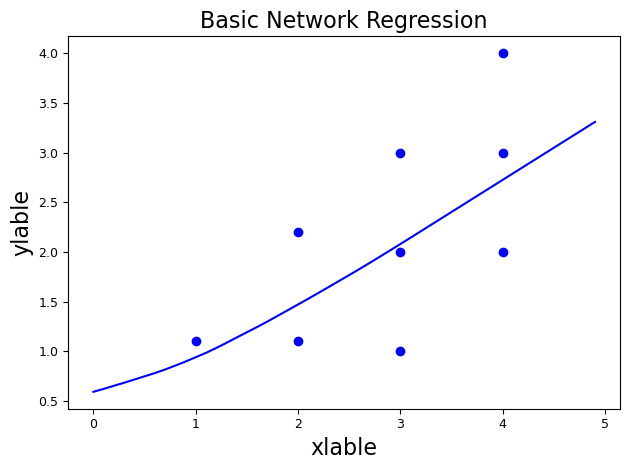

In [21]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False)
lp = wplotlib.lines(newX, Ŷline, title='Basic Network Regression')	